In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-stability-equispaced)

We choose a function over the interval $[0,1]$.

In [2]:
f = lambda x: sin(exp(2 * x))

Here is a graph of $f$ and its polynomial interpolant using seven equally spaced nodes.

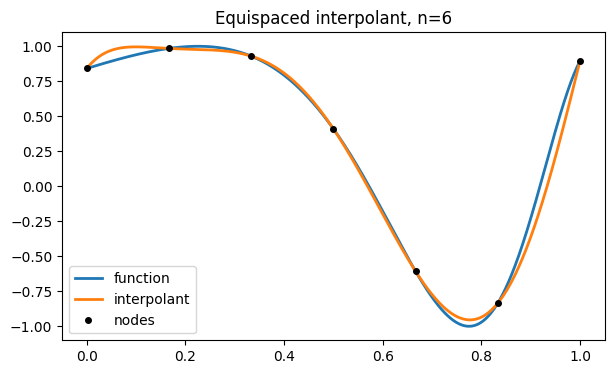

In [3]:
x = linspace(0, 1, 500)
plot(x, f(x), label="function")
t = linspace(0, 1, 7)
y = f(t)
p = FNC.polyinterp(t, y)
plot(x, p(x), label="interpolant")
plot(t, y, 'ko', label="nodes")
legend(),  title("Equispaced interpolant, n=6");

This looks pretty good. We want to track the behavior of the error as $n$ increases. We will estimate the error in the continuous interpolant by sampling it at a large number of points and taking the max-norm.

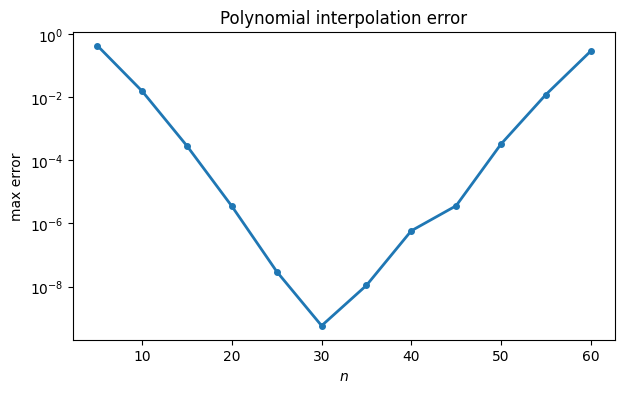

In [4]:
N = arange(5, 65, 5)
err = zeros(N.size)
x = linspace(0, 1, 1001)         # for measuring error
for k, n in enumerate(N):
    t = linspace(0, 1, n + 1)    # equally spaced nodes
    y = f(t)  # interpolation data
    p = FNC.polyinterp(t, y)
    err[k] = max(abs(f(x) - p(x)))

semilogy(N, err, "-o")
xlabel("$n$"),  ylabel("max error")
title(("Polynomial interpolation error"));

The error initially decreases as one would expect but then begins to grow. Both phases occur at rates that are exponential in $n$, i.e., $O(K^n$) for a constant $K$, appearing linear on a semi-log plot.